In [1]:
from shapely.geometry import Point
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import requests
import json

%matplotlib inline

In [2]:
with open('../data/WeGo.json') as fi:
    credentials = json.load(fi)

In [3]:
Authorization = credentials['Authorization']

In [17]:
URL = 'https://api.goswift.ly/speed-map/nashville/route/3'

params_geo = {
    'direction': '1',
    'startDate': '06-24-2022',
    'endDate' : '07-24-2022',
    'resolution': 'hiRes',
    'format' : 'geojson',
}

headers = {'Authorization': Authorization,
          'Content-Type': 'application/json'}

In [18]:
response_geo = requests.get(URL, params = params_geo, headers = headers)


In [19]:
response_geo.json()

{'type': 'FeatureCollection',
 'features': [{'type': 'Feature',
   'geometry': {'type': 'LineString',
    'coordinates': [[-86.92384824131894, 36.07396189205922],
     [-86.92357935909159, 36.073985273122474]]},
   'properties': {'fromStopId': 'H70HICEN',
    'fromStopName': 'Hwy 70 S & Hicks Ln Eb',
    'toStopId': 'H70OLDEF',
    'toStopName': 'Hwy 70 S & Old Hickory Blvd Eb',
    'pathLengthMeters': 24.305,
    'averageTravelSeconds': 1.654612,
    'averageTravelSpeed': 14.689244366655144,
    'maxSecs': 4.331,
    'percent90Secs': 2.042,
    'percent80Secs': 1.858,
    'percent70Secs': 1.753,
    'medianSecs': 1.593,
    'percent30Secs': 1.481,
    'percent10Secs': 1.332,
    'minSecs': 0.616}},
  {'type': 'Feature',
   'geometry': {'type': 'LineString',
    'coordinates': [[-86.81722038817102, 36.14103841559591],
     [-86.81703558225654, 36.141197623393865]]},
   'properties': {'fromStopId': 'WESACKEN',
    'fromStopName': 'West End Ave & Acklen Park Dr Eb',
    'toStopId': 'WES3

In [20]:
response_line_seg = response_geo.json()['features']

In [21]:
r3_gdf = gpd.GeoDataFrame.from_features(response_line_seg)

In [28]:
r3g4 = r3_gdf[r3_gdf['averageTravelSeconds'] > 6]

In [30]:
r3g4

,geometry,fromStopId,fromStopName,toStopId,toStopName,pathLengthMeters,averageTravelSeconds,averageTravelSpeed,maxSecs,percent90Secs,percent80Secs,percent70Secs,medianSecs,percent30Secs,percent10Secs,minSecs
4,"LINESTRING (-86.82550 36.13446, -86.82525 36.1...",WESLEOEN,West End Ave & Leonard Ave Eb,WESELMEN,West End Ave & Elmington Ave Eb,24.572,6.225120,3.947233,93.086,10.181,3.832,2.820,2.2025,1.751,1.490,0.734
45,"LINESTRING (-86.85220 36.12808, -86.85198 36.1...",WHIPOSSN,White Bridge Pike & Post Rd Sb,HARKENEN,West End Ave & Kenner Ave Eb,24.853,12.601047,1.972296,208.126,40.587,17.486,6.578,2.3130,1.809,1.462,1.010
86,"LINESTRING (-86.95130 36.07856, -86.95105 36.0...",H70COLEF,Hwy 70 S & Coley Davis Rd Eb,STAPLES,Hwy 70 S & Staples Park-N-Ride,24.209,8.023991,3.017077,67.214,22.355,13.103,7.583,2.9720,1.970,1.636,0.657
88,"LINESTRING (-86.78470 36.15771, -86.78447 36.1...",BRO10AEN,Broadway & 10th Ave Eb,8ABRONM,8th Ave S & Broadway Ave Nb,23.683,6.441161,3.676822,76.448,19.450,7.789,3.626,2.1030,1.791,1.571,1.109
90,"LINESTRING (-86.80465 36.14873, -86.80441 36.1...",WES23AEN,West End Ave & 23rd Ave S Eb,WES21AEN,West End Ave & 21st Ave S Eb,24.927,8.471103,2.942592,184.645,16.139,11.206,7.854,4.0370,2.389,1.787,1.281
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
979,"LINESTRING (-86.91993 36.07475, -86.91969 36.0...",H70OLDEF,Hwy 70 S & Old Hickory Blvd Eb,H70CHIEN,Hwy 70 S & Chimney Hill Eb,23.413,14.218657,1.646639,467.760,33.191,17.908,13.736,5.9430,2.469,1.492,0.593
989,"LINESTRING (-86.84773 36.12484, -86.84754 36.1...",HARWODEN,Harding Pike & Woodmont Blvd,HARKENEN,West End Ave & Kenner Ave Eb,23.943,7.378037,3.245172,93.932,11.807,5.512,3.843,2.7245,2.223,1.724,0.774
1004,"LINESTRING (-86.84793 36.12469, -86.84773 36.1...",HARWODEN,Harding Pike & Woodmont Blvd,HARKENEN,West End Ave & Kenner Ave Eb,23.943,10.550700,2.269328,93.411,41.430,8.862,4.673,2.9245,2.253,1.723,0.774
1019,"LINESTRING (-86.84426 36.12727, -86.84404 36.1...",HARKENEN,West End Ave & Kenner Ave Eb,HARWOOEN,Harding Pike & Woodlawn Dr Eb,24.542,9.558346,2.567599,332.770,24.465,16.014,8.246,2.3430,1.783,1.512,1.059


In [31]:
URL1 = 'https://api.goswift.ly/speed-map/nashville/route/3'

params_geo1 = {
    'direction': '1',
    'startDate': '05-24-2022',
    'endDate' : '06-24-2022',
    'resolution': 'hiRes',
    'format' : 'geojson',
}

headers = {'Authorization': Authorization,
          'Content-Type': 'application/json'}

In [32]:
response_geo1 = requests.get(URL1, params = params_geo1, headers = headers)
response_line_seg1 = response_geo1.json()['features']
r3_gdf1 = gpd.GeoDataFrame.from_features(response_line_seg1)


In [33]:
r3_gdf

,geometry,fromStopId,fromStopName,toStopId,toStopName,pathLengthMeters,averageTravelSeconds,averageTravelSpeed,maxSecs,percent90Secs,percent80Secs,percent70Secs,medianSecs,percent30Secs,percent10Secs,minSecs
0,"LINESTRING (-86.92385 36.07396, -86.92358 36.0...",H70HICEN,Hwy 70 S & Hicks Ln Eb,H70OLDEF,Hwy 70 S & Old Hickory Blvd Eb,24.305,1.654612,14.689244,4.331,2.042,1.858,1.753,1.5930,1.481,1.332,0.616
1,"LINESTRING (-86.81722 36.14104, -86.81704 36.1...",WESACKEN,West End Ave & Acklen Park Dr Eb,WES31AEM,West End Ave & 31st Ave S Eb,24.265,2.300465,10.547867,63.427,3.304,2.604,2.284,1.9850,1.770,1.537,0.709
2,"LINESTRING (-86.93141 36.07377, -86.93114 36.0...",H70COLEM,Hwy 70 S & Colice Jeanne Rd Eb,H70HICEN,Hwy 70 S & Hicks Ln Eb,24.285,1.446170,16.792632,3.532,1.638,1.570,1.513,1.4270,1.342,1.254,1.007
3,"LINESTRING (-86.85175 36.12782, -86.85153 36.1...",WHIPOSSN,White Bridge Pike & Post Rd Sb,HARKENEN,West End Ave & Kenner Ave Eb,24.853,2.373474,10.471149,45.927,3.910,2.856,2.370,1.9490,1.702,1.434,1.010
4,"LINESTRING (-86.82550 36.13446, -86.82525 36.1...",WESLEOEN,West End Ave & Leonard Ave Eb,WESELMEN,West End Ave & Elmington Ave Eb,24.572,6.225120,3.947233,93.086,10.181,3.832,2.820,2.2025,1.751,1.490,0.734
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048,"LINESTRING (-86.83046 36.13264, -86.83022 36.1...",WESWILEN,West End & Wilson Blvd,WESLEOEN,West End Ave & Leonard Ave Eb,23.956,1.618373,14.802521,23.499,1.891,1.737,1.652,1.5215,1.411,1.268,0.816
1049,"LINESTRING (-86.83714 36.13047, -86.83689 36.1...",HARVINEN,Harding Pike & Vine Ct Eb,WESWILEN,West End & Wilson Blvd,23.901,1.609205,14.852676,6.754,2.009,1.790,1.671,1.5180,1.414,1.263,0.625
1050,"LINESTRING (-86.87775 36.09626, -86.87751 36.0...",H70PEREN,Hwy 70 S & Percy Warner Blvd Eb,HARHAREN,Harding Pike & Harding Pl Eb,24.744,2.212281,11.184836,408.140,1.584,1.449,1.382,1.2810,1.206,1.102,0.777
1051,"LINESTRING (-86.85794 36.14930, -86.85794 36.1...",WHICHASF,White Bridge Pike & Charlotte Shone,WHICORSF,White Bridge Pike & Corbett Ln Sb,24.651,3.349682,7.359206,276.558,5.535,4.265,3.535,2.5370,1.920,1.474,0.602


In [34]:
r3_gdf1

,geometry,fromStopId,fromStopName,toStopId,toStopName,pathLengthMeters,averageTravelSeconds,averageTravelSpeed,maxSecs,percent90Secs,percent80Secs,percent70Secs,medianSecs,percent30Secs,percent10Secs,minSecs
0,"LINESTRING (-86.92385 36.07396, -86.92358 36.0...",H70HICEN,Hwy 70 S & Hicks Ln Eb,H70OLDEF,Hwy 70 S & Old Hickory Blvd Eb,24.305,1.654612,14.689244,4.331,2.042,1.858,1.753,1.5930,1.481,1.332,0.616
1,"LINESTRING (-86.81722 36.14104, -86.81704 36.1...",WESACKEN,West End Ave & Acklen Park Dr Eb,WES31AEM,West End Ave & 31st Ave S Eb,24.265,2.300465,10.547867,63.427,3.304,2.604,2.284,1.9850,1.770,1.537,0.709
2,"LINESTRING (-86.93141 36.07377, -86.93114 36.0...",H70COLEM,Hwy 70 S & Colice Jeanne Rd Eb,H70HICEN,Hwy 70 S & Hicks Ln Eb,24.285,1.446170,16.792632,3.532,1.638,1.570,1.513,1.4270,1.342,1.254,1.007
3,"LINESTRING (-86.85175 36.12782, -86.85153 36.1...",WHIPOSSN,White Bridge Pike & Post Rd Sb,HARKENEN,West End Ave & Kenner Ave Eb,24.853,2.373474,10.471149,45.927,3.910,2.856,2.370,1.9490,1.702,1.434,1.010
4,"LINESTRING (-86.82550 36.13446, -86.82525 36.1...",WESLEOEN,West End Ave & Leonard Ave Eb,WESELMEN,West End Ave & Elmington Ave Eb,24.572,6.225120,3.947233,93.086,10.181,3.832,2.820,2.2025,1.751,1.490,0.734
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048,"LINESTRING (-86.83046 36.13264, -86.83022 36.1...",WESWILEN,West End & Wilson Blvd,WESLEOEN,West End Ave & Leonard Ave Eb,23.956,1.618373,14.802521,23.499,1.891,1.737,1.652,1.5215,1.411,1.268,0.816
1049,"LINESTRING (-86.83714 36.13047, -86.83689 36.1...",HARVINEN,Harding Pike & Vine Ct Eb,WESWILEN,West End & Wilson Blvd,23.901,1.609205,14.852676,6.754,2.009,1.790,1.671,1.5180,1.414,1.263,0.625
1050,"LINESTRING (-86.87775 36.09626, -86.87751 36.0...",H70PEREN,Hwy 70 S & Percy Warner Blvd Eb,HARHAREN,Harding Pike & Harding Pl Eb,24.744,2.212281,11.184836,408.140,1.584,1.449,1.382,1.2810,1.206,1.102,0.777
1051,"LINESTRING (-86.85794 36.14930, -86.85794 36.1...",WHICHASF,White Bridge Pike & Charlotte Shone,WHICORSF,White Bridge Pike & Corbett Ln Sb,24.651,3.349682,7.359206,276.558,5.535,4.265,3.535,2.5370,1.920,1.474,0.602


In [35]:
URL = 'https://api.goswift.ly/speed-map/nashville/route/3'

params_geo = {
    'direction': '1',
    'startDate': '06-24-2022',
    'endDate' : '07-24-2022',
    'resolution': 'hiRes',
    'format' : 'geojson',
    'daysOfWeek' : '1,2,3,4,5',
    
}

headers = {'Authorization': Authorization,
          'Content-Type': 'application/json'}

In [36]:
response_geo = requests.get(URL, params = params_geo, headers = headers)
response_line_seg = response_geo.json()['features']
r3_gdf = gpd.GeoDataFrame.from_features(response_line_seg)

<AxesSubplot:>

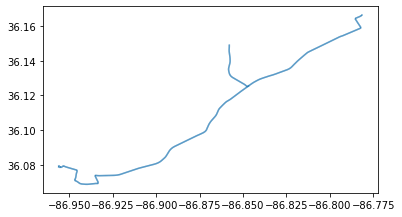

In [37]:
r3_gdf.plot()

<AxesSubplot:>

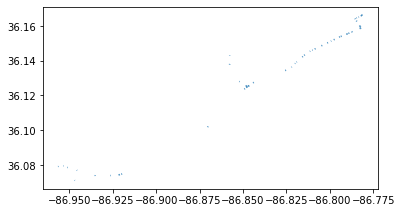

In [46]:
r3_gdf[r3_gdf['averageTravelSeconds'] > 6].plot()

<AxesSubplot:>

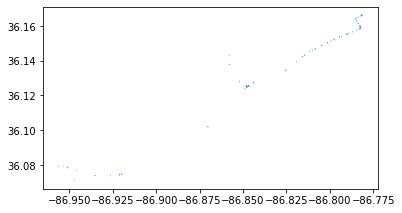

In [45]:
r3_gdf1[r3_gdf1['averageTravelSeconds'] > 6].plot()

In [42]:
URL2 = 'https://api.goswift.ly/speed-map/nashville/route/3'

params_geo2 = {
    'direction': '1',
    'startDate': '04-24-2022',
    'endDate' : '05-24-2022',
    'resolution': 'hiRes',
    'format' : 'geojson',
    'daysOfWeek' : '1,2,3,4,5',
    
}

headers = {'Authorization': Authorization,
          'Content-Type': 'application/json'}

In [43]:
response_geo2 = requests.get(URL2, params = params_geo2, headers = headers)
response_line_seg2 = response_geo2.json()['features']
r3_gdf2 = gpd.GeoDataFrame.from_features(response_line_seg2)

In [44]:
r3_gdf2

,geometry,fromStopId,fromStopName,toStopId,toStopName,pathLengthMeters,averageTravelSeconds,averageTravelSpeed,maxSecs,percent90Secs,percent80Secs,percent70Secs,medianSecs,percent30Secs,percent10Secs,minSecs
0,"LINESTRING (-86.92385 36.07396, -86.92358 36.0...",H70HICEN,Hwy 70 S & Hicks Ln Eb,H70OLDEF,Hwy 70 S & Old Hickory Blvd Eb,24.305,1.725075,14.089242,19.382,2.105,1.875,1.772,1.622,1.501,1.347,0.742
1,"LINESTRING (-86.81722 36.14104, -86.81704 36.1...",WESACKEN,West End Ave & Acklen Park Dr Eb,WES31AEM,West End Ave & 31st Ave S Eb,24.265,2.580958,9.401548,77.003,3.817,2.956,2.612,2.209,1.952,1.698,0.988
2,"LINESTRING (-86.93141 36.07377, -86.93114 36.0...",H70COLEM,Hwy 70 S & Colice Jeanne Rd Eb,H70HICEN,Hwy 70 S & Hicks Ln Eb,24.285,1.449138,16.758238,4.539,1.685,1.570,1.511,1.426,1.346,1.242,0.767
3,"LINESTRING (-86.85175 36.12782, -86.85153 36.1...",WHIPOSSN,White Bridge Pike & Post Rd Sb,HARKENEN,West End Ave & Kenner Ave Eb,24.853,2.376616,10.457306,22.545,3.923,2.990,2.489,1.979,1.749,1.474,0.396
4,"LINESTRING (-86.82550 36.13446, -86.82525 36.1...",WESLEOEN,West End Ave & Leonard Ave Eb,WESELMEN,West End Ave & Elmington Ave Eb,24.572,7.522642,3.266406,92.928,10.834,4.216,3.351,2.528,2.016,1.587,0.471
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048,"LINESTRING (-86.87775 36.09626, -86.87751 36.0...",H70PEREN,Hwy 70 S & Percy Warner Blvd Eb,HARHAREN,Harding Pike & Harding Pl Eb,24.744,1.527583,16.198138,23.502,1.702,1.493,1.398,1.294,1.209,1.111,0.847
1049,"LINESTRING (-86.83046 36.13264, -86.83022 36.1...",WESWILEN,West End & Wilson Blvd,WESLEOEN,West End Ave & Leonard Ave Eb,23.956,2.213309,10.823613,81.857,2.300,1.894,1.757,1.591,1.457,1.304,0.755
1050,"LINESTRING (-86.83714 36.13047, -86.83689 36.1...",HARVINEN,Harding Pike & Vine Ct Eb,WESWILEN,West End & Wilson Blvd,23.901,1.754796,13.620387,9.176,2.377,1.988,1.832,1.620,1.480,1.319,0.832
1051,"LINESTRING (-86.84734 36.12513, -86.84714 36.1...",HARWODEN,Harding Pike & Woodmont Blvd,HARKENEN,West End Ave & Kenner Ave Eb,23.943,3.022510,7.921562,19.718,4.189,3.619,3.255,2.748,2.358,1.872,0.721
